In [2]:
import pandas as pd
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [6]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [7]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [8]:
def average_minutes2(data, activity_code):
    cols = activity_columns(data, activity_code)
    activity_data = data[cols]
    activity_sums = activity_data.sum(axis=1)
    data = data[['TUFINLWGT']]
    data['minutes'] = activity_sums
    data = data.rename(columns={"TUFINLWGT": "weight"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [9]:
respondents = pd.read_csv("atusdata/atusresp_2013/atusresp_2013.dat")
activities = pd.read_csv("atusdata/atusact_2013/atusact_2013.dat")

In [12]:
working = summary[["t120303","t120308","t120101","t120301"]]
working.columns = ["Watching_TV", "Computer For Leasure", "Social for Fun", "Relax and Think"]

{'Social For Fun': 39.000540094889423, 'Computer For Leasure': 12.540250054915514, 'Relax and Think': 17.827459228425081, 'Watching TV AVG': 165.97119226232343}


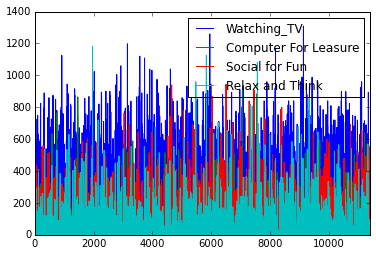

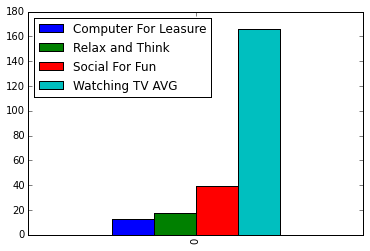

In [13]:
working.plot()
d = {"Watching TV AVG" :average_minutes(summary, '120303'), "Computer For Leasure" :average_minutes(summary, '120308'), "Social For Fun": average_minutes(summary, '120101'), "Relax and Think": average_minutes(summary, '120301')}
print(d)
avgfun = pd.DataFrame(d, range(1))
avgfun.plot(kind="bar")

### Watching TV seems to be the most common form of entertainment, lets put the data in a few mediums and see if this holds true

{'Relax and Think': 17.827459228425081, 'Computer For Leasure': 12.540250054915514, 'Video Games': 13.41856801229944, 'Social For Fun': 39.000540094889423, 'Watching TV AVG': 165.97119226232343}


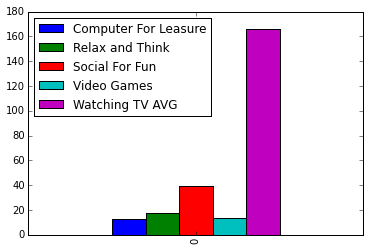

In [14]:
d = {"Watching TV AVG" :average_minutes(summary, '120303'),"Video Games":average_minutes(summary, '120307'), "Computer For Leasure" :average_minutes(summary, '120308'), "Social For Fun": average_minutes(summary, '120101'), "Relax and Think": average_minutes(summary, '120301')}
print(d)
avgfun = pd.DataFrame(d, range(1))
avgfun.plot(kind="bar")

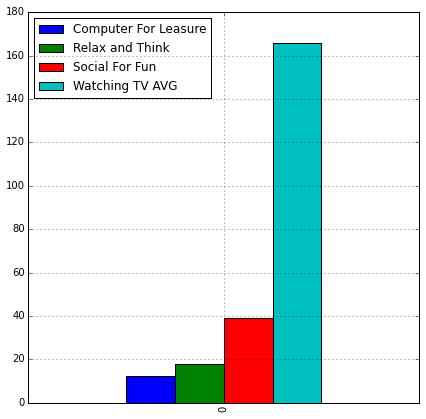

In [40]:
working
def aboveaverage(tv):
    if tv > 165.9:
        return tv
    else:
        return None
working = working.dropna()
d = {"Watching TV AVG" :average_minutes(summary, '120303'), "Computer For Leasure" :average_minutes(summary, '120308'), "Social For Fun": average_minutes(summary, '120101'), "Relax and Think": average_minutes(summary, '120301')}

#print(d)
avgfun = pd.DataFrame(d, range(1))
avgfun.plot(kind="bar", figsize=(7,7))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10865c358>], dtype=object)

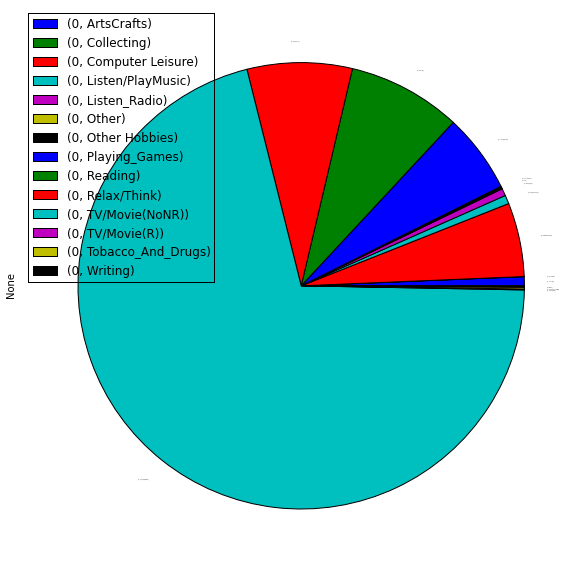

In [15]:
fun = summary[activity_columns(summary, '1203')]
d = {"Relax/Think" :average_minutes(summary, '120301'), "Tobacco_And_Drugs" :average_minutes(summary, '120302'), "TV/Movie(NoNR)": average_minutes(summary, '120303'), "TV/Movie(R)": average_minutes(summary, '120304'), "Listen_Radio": average_minutes(summary, '120305'), "Listen/PlayMusic": average_minutes(summary, '120306'),"Playing_Games": average_minutes(summary, '120307'),"Computer Leisure": average_minutes(summary, '120308'),"ArtsCrafts": average_minutes(summary, '120309'),"Collecting": average_minutes(summary, '120310'),"Other Hobbies": average_minutes(summary, '120311'),"Reading": average_minutes(summary, '120312'),"Writing": average_minutes(summary, '120313'),"Other": average_minutes(summary, '120399')}
fullfun = pd.DataFrame(d, range(1))
stackfull = fullfun.stack()
stackfull.plot("pie",  subplots=True, figsize=(10, 10), fontsize=.000000001, legend=True)

In [21]:
key = {"tucaseid": 'household', "TUFINLWGT": "weight", 'TRYHHCHILD': "Age_of_youngest_child", "TEAGE": "Age",
"TESEX": "Gender","PEEDUCA": "Notsure", "TELFS": "labor_force_status", "TEMJOT": "last_7_Days__more_then_one_job",
"TRDPFTPT": "full time or part time", "TESCHENR": "student_status", "TESCHLVL": "allocation_flag", "TRSPPRES": "spouse_parter_in_house",
"TESPEMPNOT":"employment_status_of_SO", "TRERNWA": "weekly_earning_main_job", "TRCHILDNUM": "num_house_child", "TRSPFTPT": "full/part_employ_SO",
"TEHRUSLT": "total_hours_worked_per_week", "TUDIARYDAY":"day_of_interview", "TRHOLIDAY": "flag_if_interviewday_was_holiday",
"TRTEC": "totaltimespent_providing_eldercare", "TRTHH": "totaltimespend_childcare", 't010101': 'sleeping', 't010102': 'sleeplessness', 't010201': 'washing,dressingandgroomingoneself', 't010299': 
'GroomingNEC' , 't010301' : 'Health-relatedselfcare', 't010399': "selfcareNEC", 't010401':'Personal/Private_activities', 't020101':'InteriorCleaning', 't020102':'Laundry', 't020103':'Sewing,repairing&maintaintextiles', 't020104':'Storing/interioritems,food', 't020199':'housework', 't020201':'food/drinkprep', 't020202':'foodpresentation', 't020203':'kitchen/foodcleanup', 't020299':'food/drinkprep/present/clean', 't020301':'interiorarrange,decorate,repair', 't020302':'building/repair,furniture', 
't020303':'healing/cooking', 't020399':'interiormaintenance,repairdecorate', 't020401':'exteriorcleaning', 't020402':'exteriorrepair,improve,decorate', 't020499':'exteriormaintenance,repair,decorateNEC', 't020501':
'lawn,garden,houseplantcare', 't020502':'ponds,pools,hottubs', 't020599':'lawn/garden', 't020601':'animals/pets', 't020602':'walking/exercising/playingwithanimals', 't020699':'pet/animalcareNEC', 't020701':
'vehiclerepair(byself)', 't020799':'vehiclesNEC', 't020801':'appliance,tool,toysetup,repair(byself)', 't020899':'appliances/toolsNEC', 't020901':'financialmanagement', 't020902':'household/personalorganize/planning', 't020903':'HH/personalmail/messages', 't020904':'hh/personal/email/messages', 't020905':'homesecurity', 't020999':'household,managementNEC', 't029999':'householdactivities', 't030101':'physicalcare,forhhchildren', 't030102':'reading_to_hh_children', 't030103':'playing_with_hh_children_not_sports', 't030104':'arts/crafts_children', 't030105':'playing_sports_hh_children', 't030106':'talking/listening_hh_children', 't030108':'organization/planning_for_hh_children', 't030109':'watching_hh_children', 't030110':'attending_hh_child_event', 't030111':'waiting_for/with_hh_children', 't030112':'pickingup/droppingoff_hh_children',
't030199':'caring/helping_hh_children', 't030201':'homework_hhchildren', 't030202':'meeting_school_conferences', 't030203':'homeschool_hh_children', 't030299':'activities,relatedto_hh_education', 't030301':
'providing_medical_care_to_hh_child', 't030302':'obtaining_medical_care_hh_child', 't030303':'waiting_associated_hh_child_health', 't030399':'activities_related_childhealthNEC', 't030401':'physical_care_hh_adults', 't030402':'looking_after_hh_adult', 't030403':'medical_care_hh_adult', 't030404':'obtaining_medical_car_hh_adult', 't030405':'waiting_associated_caring_hh_adult', 't030499':'caring_hh_adults', 't030501':'helping_hh_adults', 't030502':'organization/planning_hh_adults', 't030503':'picking_up/dropping_off_hh_adult', 't030504':'waiting_associated_helping_hh_adults', 't030599':'helping_household_adultsNEC', 't039999':'caring_helping_hh_membersNEC', 't040101':'physical_car_nonhh_children', 't040102':'reading_to/with_nonhh_children', 't040103':'playing_nonhh_children_notsport', 't040104':'arts/crafts_nonhh_children', 't040105':'playing_sports_nonhh_children', 't040106':'talking/listening_nonhh_children', 't040108':'organization_planning_nonhh_children', 't040109': 'looking_after_nonhh_children', 't040110':'attending_nonhh_children_event', 't040111':'waiting_for/with_nonhh_children', 't040112':'dropping_off/picking_up_nonhh_childrenNEC', 't040199':'caring_helping_nonhh_childrenNEC',
't040201':'homework_nonhh_children', 't040299':'activities_related_nonhh_educNEC', 't040301':'providing_medical_car_nonhh_children', 't040302':'obtaining_medicalcare_nonhh_children', 't040401':'physical_car_nonhh_adults', 't040402':'looking_after_nonhh_adult(primary activity)', 't040403':'providing_medical_car_to_nonhh_adult', 't040404':'obtaining_medical_car_services_nonhh_adult', 't040405':'waiting_associated_with_caring_nonhhadults', 't040499':'caring_for_nonhh_adultsNEC', 't040501':'housework,cooking_shopping,assistance_nonhh_adults', 't040502':'house_lawn_repair_assistance_nonhh_adults', 't040503':'animal/pet_care_assist_nonhh_adults',
't040504':'vehicle_appliance_maintenance/repair_assistance_nonhh_adults', 't040505':'financial_manage_assist_nonhh_adults', 't040506':'household_manage_paperwork_assistance_nonhh_adults', 't040507':'picking_up/dropping_off_nonhh_adult', 't040508':'associated_helping_nonhh_adults', 't040599':'nonhh_adultsNEC', 't050101':'work,mainjob', 't050102':'work,otherjob', 't050103':'security_procedures_related_work', 't050104':'waiting_associated_working', 't050199':'workingNEC', 't050201':'socializing,relaxing,leisure_part_of_job', 't050202':'eating/drinking_part_job', 't050205':'waiting_associated_with_work-related_activities', 't050301':'income-generating_hobbies/crafts/food', 't050302':'income-generating_performances', 't050303':'income-generating_rental_property_activities', 't050304':'income-generating_rental_property_activities', 't050305':'waiting_associated_other_income_generating_activities', 't050399':'other_income_generatingNEC', 't050401':'job_search_activites', 't050403':'job_interviewing', 't050404':'associated_job_search_interview', 't059999':'work/work-related_activitiesNEC', 't060101':'taking_class_dagree,certification,licensure', 't060102':'taking_class_personal_interest',
't060103':'waiting_associated_taking_classes', 't060199':'taking_classNEC', 't060201':"extracurricular_club_activities", 't060202':'extracurricular_music/performance_activities', 't060299':'education-related_extracurricular_actNEC', 't060301':'research/homework_class_degree,cert,licensure', 't060302':'research/homework_class_pers.interest', 't060303':'associated_research/homework', 't060399':'research/homeworkNEC', 't060401':'admin_activities_class_dagree/cert/licensure', 't060402':'admin_act_class_personal_interst', 't060403':'associated_w/admin.activites(education)', 't060499':'admin_educationNEC', 't069999':'educationNEC', 't070101':'grecery_shopping', 't070102':'purchasing_gas', 't070103':'purchasing_food', 't070104':'shopping,except_food/gas', 't070105':'associated_with_shopping',
't070201':'comparison_shopping', 't080101':'paid_childcare_services', 't080201':'banking', 't080202':'using_financial_services', 't080203':'waiting_associated_with/banking/financial_services', 't080301':'legal_services', 't080401':'health_car_services_outside_home', 't080402':'in-home_health_care_services', 't080403':'waiting_associated_medical_services', 't080499':'medical_services', 't080501':'personal_care_services', 't080502':'waiting_associated_w/personal_care_services',
't080601':'act_purchasing/selling_real_estate', 't080602':'waiting_associated_w/purchasing/selling_real_estate', 't080701':'veterinary_services', 't080702':'waiting_associated_vetinary_services', 't089999':'professional_personal_services', 't090101':'interior_cleaning_services', 't090103':'clothing_repair_cleaning_services', 't090199':'using_household_services', 't090201':'home_maint/repair/decor/construction', 't090202':'waiting_associated_w/home/repair/decor/constr', 't090301':'pet_services', 't090302':'associated_pet_services', 't090399':'using_pet_servicesNEC', 't090401':'lawn_garden_services',
't090499':'lawn_garden_servicesNEC', 't090501':'vehicle_maint_repair_services', 't090502':'waiting_associated_vehicle_main_repair', 't090599':'using_vehiclemaint/repair_svcs,NEC', 't099999':'household_servicesNEC', 't100101':'police_fire_services', 't100102':'social_services', 't100103':'obtaining_licenses/paying_fines_fees_taxes', 't100199':'using_government_servicesNEC', 't100201':'civic_obligations/participation', 't100304':'waiting_associated_using_government_services', 't100499':'security_procedures_rel_govt_svcs/civic_obligations', 't109999':'government_servicesNEC', 't110101':'eating/drinking', 't110201':'waiting_associated_w/eating_drinking', 't120101':'socializing_communicating', 't120201':'attending/hosting_parties/receptions/ceremonies', 't120202':'attending_meeting_personal_interst(not_volunteering)', 't120299':'attending/hosting_social_eventsNEC', 
't120301':'relaxing,thinking', 't120302':'tobacco/drug_use', 't120303':'TV/movies(nonR)', 't120304':'TV(R)', 't120305':'listen_to_radio', 't120306':'listen_to/playing_music', 't120307':'playing_games', 't120308':'computer_use_leisure', 't120309':'arts/crafts_as_hobby', 't120310':'collecting_hobby', 't120311':'hobbies,except_arts/crafts_collecting', 't120312':'reading_personal_interest', 't120313':'writing_personal_interest', 't120399':'relaxing/leisureNEC',
't120401':'attending_performing_arts', 't120402':'attending_museums', 't120403':'attending_movies/film', 't120404':'attending_gambling_establishments', 't120499':'arts_entertainmentNEC', 't120501':'waiting_assoc.w/socializing_communicating', 't120502':'waiting_assoc.w/attending/hosting_social_events', 't120503':'waiting_assoc.w/_relaxing/leisure', 't120504':'waiting_assoc./w_arts/entertainment', 't120599':'waiting_assoc./w_socializingNEC', 't129999':'socializing/relaxing/leisureNEC', 
't130101':'doing_aerobics', 't130102':'playing_baseball', 't130103':'playing_basketball', 't130104':'biking', 't130105':'playing_billiards', 't130106':'boating', 't130107':'bowling', 't130108':'climbing,spelunking,caving', 't130109':'dancing', 't130110':'participating_equestrian_sports', 't130112':'fishing', 't130113':'playing_football', 't130114':'golfing', 't130115':'doing_gymnastics', 't130116':'hiking', 't130117':'playing_hockey', 't130118':'hunting', 't130119':'participating_martial_arts', 't130120':'playing_racquet_sports', 't130122':"rollerblading", 't130123':'playing_rugby', 't130124':'running', 't130125':'skiing,ice_skating,snowboarding', 't130126':'playing_soccer', 't130127':'softball', 't130128':'using_cardiovascular_equipment', 't130129':'vehicle_touring/racing', 't130130':'playing_vollyball', 't130131':'walking', 't130132':'participating_water_sports', 't130133':'weightlifting/strength_training', 't130134':'working_out,unspecified', 't130135':'wrestling', 't130136':'doing_yoga', 't130199':'playing_sportsNEC', 't130202':'watching_baseball', 
't130203':'watching_basketball', 't130205':'watching_biliards', 't130206':'watching_boating', 't130207':'watching_bowling', 't130210':'watching_equestrian_sports', 't130213':'watching_football', 't130215':'watching_gymnastics', 't130216':'watching_hockey', 't130218':'watching_racquet_sports', 't130219':'watching_rodeo_competitions', 't130220':'watching_rollerblading', 't130221':'watching_rugby', 't130222':'watching_running', 't130223':'watching_skiing,ice_skating,snowboarding', 't130224':'watching_soccer', 't130225':'watching_softball', 't130226':'watching_vehicle_touring/racing', 't130227':'watching_volleyball', 't130229':'watching_water_sports', 't130232':'watching_wrestling', 't130299':'attending_sporting_eventNEC', 't130301':'waiting_related_playing_sports_exercising', 't130302':'waiting_related_attending_sporting_events', 't139999':'sports,exercise,recrationNEC', 't140101':'attending_religous_services', 't140102':'participation_religous_practices', 

       't140103':'waiting_associated.w/religious&spiritual_activities', 't140105':'religious_education_act', 't149999':'religous_spirtual_actNEC',
       't150101':'computer_use', 't150102':'organizing/preparing', 't150103':'reading', 't150104':'telephone_calls(except_hotline_counseling)', 't150105':'writing', 
       't150106':'fundraising', 't150199':'administrative&support_activeNEC', 't150201':'food_prep,presentation,clean-up', 't150202':'collecting&delivering_clothing&other_goods', 't150203':'providing_car', 't150204':'teaching,leading,counseling,mentoring', 't150299':'social_service&care_activitiesNEC', 't150301':'building_houses,wildlifesites&other_structures', 't150302':'indoor&outdoor_maintenance,repair&clean-up', 't150399':'indoor&outdoor_maintenance,building&clean-up_activities', 't150401':'performing', 't150402':'serving_volunteering_events&cultural_activities', 't150499':'participating_performance&cultural_activitiesNEC',

       't150501':'attending_meetings,conferences,training', 't150599':'attending_meetings,conferences&trainingNEC', 't150601':'public_heatlh_activities', 't150602':'public_safety_activities', 't150699':'public_health_safety_activitiesNEC', 't150701':'waiting_associated_volunteer_activities', 't150801':'security_procedures_related_volunteer_act', 't159999':'volunteer_activitiesNEC', 't160101':'telephone_calls_to/from_family_members', 't160102':'telephone_calls_to/from_friends/neighbors/acquaintances', 't160103':'telephone_calls_to/from_education,services,providers', 't160104':'telephone_calls_to/from_salespeople', 't160105':'telephone_calls_to/from_professional/personal_care_svcs_providers', 't160106':'telephone_calls_to/from_household_services_providers', 't160107':'telephone_calls_to/from_paid_child/adult_car_providers', 't160108':'telephone_calls_to/from_government_officials'
,'t160199':"telephone_callsNEC", 't160201':'waiting_associated_with_telephone_calls', 
       't169999':'telephone_callsNEC', 't180101':'travel_related_personal_car', 't180199':'travel_related_personal_carNEC', 't180201':'travel_related_housework', 't180202':'travel_related_food/drink_prep/clean-up/presentation', 't180203':'travel_related_interior_maintenance/repair&decoration', 't180204':'travel_related_exterior_maintenance/repair/decoration', 't180205':'travel_related_lawn/garden/houseplantcare',
    't180206':'travel_related_careAnimals/pets', 't180207':'travel_related_vehiclecare/maintenance(by_self)', 't180208':'travel_related_appliance/tool/toysetup/repair/maintance/(by_self)', 't180209':'travel_related_household_management', 't180299':'travel_related_to_household_act', 't180301':'travel_related_caring_helping_hhchildren', 't180302':'travel_related_hhchildrens_education', 't180303':'travel_related_hhchildrens_health', 't180304':'travel_related_caring_hhadults', 't180305':'travel_related_helping_hhadults', 't180401':'travel_related_caring/helping_nonhh_children', 't180402':'travel_related_nonhh_childrens_education', 't180403':'travel_related_nonhh_childrens_health', 't180404':'travel_related_caring_nonhh_adults', 't180405':'travel_related_helping_nonhh_adults', 't180501':'travel_related_working', 't180502':'travel_related_work-related_activities', 't180503':'travel_related_income-generating_activities', 't180504':'travel_related_job-search&interviewing', 't180599':'travel_related_workNEC', 't180601':'travel_related_taking_class', 't180602':'travel_related_extracurricular_activites(sports)', 't180603':'travel_related_research/homework', 't180604':'travel_related_registration/administrative_activities', 't180699':'travel_related_educationNEC', 't180701':'travel_related_grocery-shopping', 't180702':'travel_related_purchasing-gas',
't180703':'travel_related_purchasing-food', 't180704':'travel_related_shopping/exgroceries/food/gas', 't180799':'travel_related_consumer-purchasesNEC', 't180801':'travel_related_childcare_services', 't180802':'travel_related_financial_services/banking', 't180803':'travel_related_legal_services', 't180804':'travel_related_medical_services', 't180805':'travel_related_personal_care_services', 't180806':'travel_related_real_estateservices', 't180807':'travel_related_veterinary_services', 't180899':'travel_rel_using_prof.&personal_car_servicesNEC', 't180901':'travel_related_household_services', 't180902':'travel_related_home./repair/decor/construction', 't180903':'travel_related_pet_services(not_vet)', 't180904':'travel_related_lawn/garden-services', 't180905':'travel_related_vehicle/maintenance&repair-services', 't180999':'travel_related_household_servicesNEC', 't181001':'travel_related_government-services', 't181002':'travel_related_civic-oligations&participation', 't181099':'travel_rel.govtsvcs&civicobligationsNEC', 't181101':'travel_related_eating/drinking', 't181201':'travel_related_socializing/communicating', 't181202':'travel_related_hosting_socialevents', 't181203':'travel_related_relaxing/leisure', 't181204':'travel_related_arts/entertainment', 't181205':'travel_entertainment', 't181299':'travel_rel.socializing/relaxing&leisureNEC', 't181301':'travel_related_participating_sports/exercise/recreation', 't181302':'travel_related_attending_sporting/recration_events', 't181401':'travel_related_religious', 't181499':'travel_rel.religousNEC', 't181501':'travel_related_volunteering', 't181599':'travel_related_volunteer_activitiesNEC', 't181601':'travel_related_phone_calls', 't181801':'security_procedures_related_traveling', 't189999':'travelingNEC', 't500101':'insufficient_detail', 't500103':'missing_travel_or_destination', 't500105':'respondent_refused_provide_information', 't500106':'Gap/cant_remember', 't500107':'unable_to_code_activity_1st_tier' }
test = summary.rename(index=None, columns=key)
test.head()

,household,weight,Age_of_youngest_child,Age,Gender,Notsure,PTDTRACE,PEHSPNON,GTMETSTA,labor_force_status,...,travel_related_volunteering,travel_related_volunteer_activitiesNEC,travel_related_phone_calls,security_procedures_related_traveling,travelingNEC,insufficient_detail,missing_travel_or_destination,respondent_refused_provide_information,Gap/cant_remember,unable_to_code_activity_1st_tier
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def average_minutes(data, activity_name):
    activity_col = activity_name
    data = data[["weight", activity_col]]
    data = data.rename(columns={activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

def get_input(dataset):
    done = False
    avg = input("want the average? y/n")
    clean = input("Want your data cleaned?  We drop zeros and nan. y/n")
    columns=[]
    if avg == "y":
        print("Automatically including weight and household because you want the average")
        columns.append('weight')
    for item in dataset.columns.tolist():
        print(item)
    while done == False:
        print("Enter you column as appears above, type DONE when done, or CLEAR if you messup")
        column = input("What columns do you want?")
        if column=='DONE':
            done=True
            break
        if column=='CLEAR':
            columns=[]
        columns.append(column)
    return(avg,clean,columns)

def querys(datawork, query):
    return datawork[query]

def datasets(dataset, query=None):
    avg,clean,columns = get_input(dataset)
    data = dataset[columns]
    if query is not None:
        data = querys(data, query)
    data.describe()
    if avg == 'y':
        newdataframe = {}
        for item in data.columns.tolist():
            if item == "weight":
                pass
            else:
                newdataframe[item] = [average_minutes(data, item)]
        data = pd.DataFrame.from_dict(newdataframe, orient='columns', dtype=None)
    if clean == 'y':
        for item in data.columns.tolist():
            if item == "weight":
                pass
            else:
                data = data[data[item] > 0]
                print(data)
        return data
    return data

In [32]:
average_minutes(test, 'Age')


45.212956731631657

In [33]:
print("TEST ME")
agequery = test.Age < 18
newdataiset = datasets(test)


want the average? y/ny
Want your data cleaned?  We drop zeros and nan. y/ny
Automatically including weight and household because you want the average
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaintenance,repairdecora

In [34]:
newdataiset


,performing,travel_related_personal_car
0,0.371779,0.802889


In [38]:
from BekksRoom import messy

### Test the wrapper below

want the average? y/n y
Want your data cleaned?  We drop zeros and nan. y/n y
Automatically including weight because you want the average
Want hypothesis testing? y/n n
household
weight
Age_of_youngest_child
Age
Gender
Notsure
PTDTRACE
PEHSPNON
GTMETSTA
labor_force_status
last_7_Days__more_then_one_job
full time or part time
student_status
allocation_flag
spouse_parter_in_house
employment_status_of_SO
weekly_earning_main_job
num_house_child
full/part_employ_SO
total_hours_worked_per_week
day_of_interview
flag_if_interviewday_was_holiday
totaltimespent_providing_eldercare
totaltimespend_childcare
sleeping
sleeplessness
washing,dressingandgroomingoneself
GroomingNEC
Health-relatedselfcare
selfcareNEC
Personal/Private_activities
InteriorCleaning
Laundry
Sewing,repairing&maintaintextiles
Storing/interioritems,food
housework
food/drinkprep
foodpresentation
kitchen/foodcleanup
food/drinkprep/present/clean
interiorarrange,decorate,repair
building/repair,furniture
healing/cooking
interiormaint

(   softball  travel_related_religious
 0  0.062652                    1.1917,
 <matplotlib.axes._subplots.AxesSubplot at 0x1046645c0>)

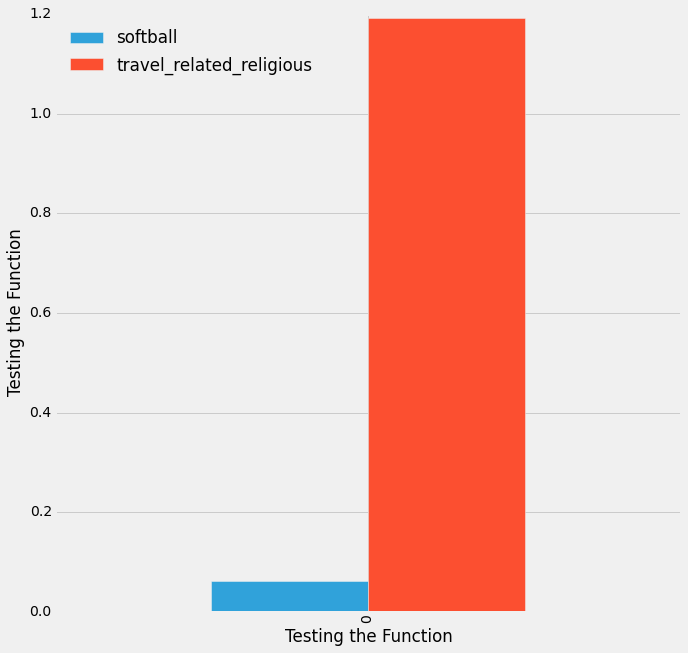

In [40]:
messy.datasets(test)